In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 48% 1.29G/2.70G [00:58<01:08, 22.2MB/s]

In [ ]:
from zipfile import ZipFile
file_name = "/content/new-plant-diseases-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

In [32]:
from zipfile import ZipFile
file_name = "/content/new-plant-diseases-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


IMPORTING NECESSARY LIBARIES 

In [14]:
import os
import tensorflow as tf
import numpy as np

In [24]:
# Set the parameters for data augmentation and preprocessing
target_size = (224, 224)
batch_size = 32

In [6]:
train_dataset_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
validation_dataset_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [7]:
# Create ImageDataGenerator for data augmentation and preprocessing
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    validation_split=0.2  # Split validation set
)

In [8]:
# Load the dataset using ImageDataGenerator
train_generator = data_generator.flow_from_directory(
    train_dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify subset as training set
)

Found 56251 images belonging to 38 classes.


In [10]:
valid_generator = data_generator.flow_from_directory(
    validation_dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation set
)

Found 3503 images belonging to 38 classes.


In [12]:
# Get the number of classes
num_classes = train_generator.num_classes

# Print the class labels
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)
print("Num classes:" , num_classes)

Class Labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Toma

DISPLAYNG THE IMAGES 

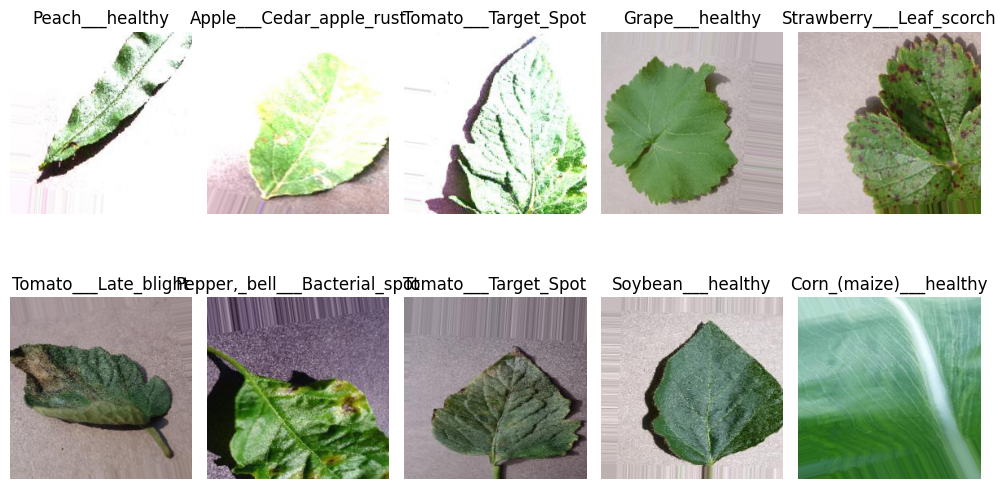

In [15]:
label_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Plot the first 10 images in the batch
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    ax[row, col].imshow(images[i])
    ax[row, col].set_title(label_names[np.argmax(labels[i])])
    ax[row, col].axis('off')
plt.tight_layout()
plt.show()
     

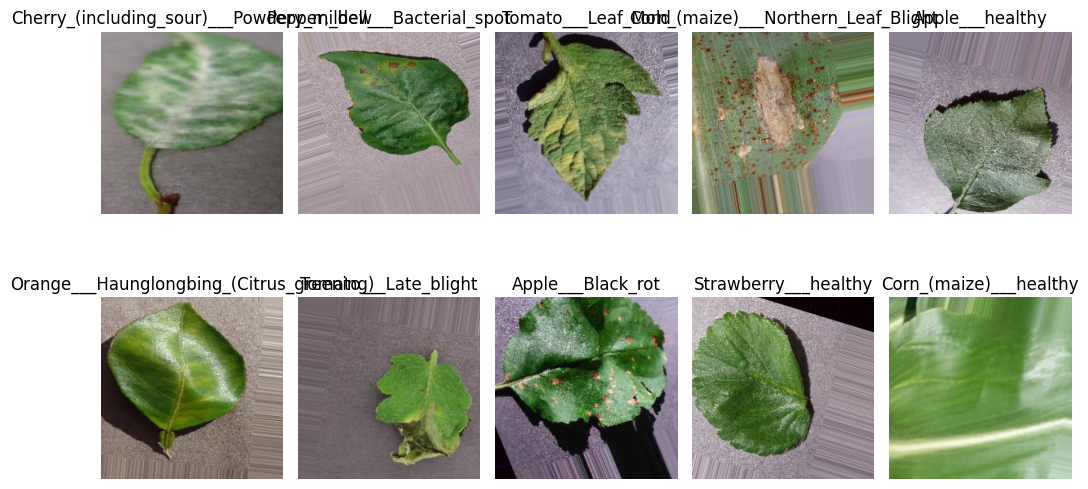

In [16]:
label_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Plot the first 10 images in the batch
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    ax[row, col].imshow(images[i])
    ax[row, col].set_title(label_names[np.argmax(labels[i])])
    ax[row, col].axis('off')
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



# Create a Sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer with 64 filters and a 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a 3x3 kernel size
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 6 units and softmax activation (for multi-class classification)
model.add(Dense(38, activation='softmax'))

# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

In [20]:
batch_size = 32
num_train_samples = len(train_generator.filenames)
num_val_samples = len(valid_generator.filenames)

train_steps = num_train_samples // batch_size
val_steps = num_val_samples // batch_size
num_epochs = 10  # Adjust this based on model convergence

training the model 

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=val_steps)

Epoch 1/10
1757/1757 [==============================] - 781s 442ms/step - loss: 1.7851 - accuracy: 0.4751 - val_loss: 0.9880 - val_accuracy: 0.6892
Epoch 2/10
1757/1757 [==============================] - 744s 423ms/step - loss: 0.9491 - accuracy: 0.7020 - val_loss: 0.6172 - val_accuracy: 0.8131
Epoch 3/10
1757/1757 [==============================] - 743s 423ms/step - loss: 0.7130 - accuracy: 0.7733 - val_loss: 0.5526 - val_accuracy: 0.8234
Epoch 4/10
1757/1757 [==============================] - 752s 428ms/step - loss: 0.5795 - accuracy: 0.8171 - val_loss: 0.4394 - val_accuracy: 0.8592
Epoch 5/10
1757/1757 [==============================] - 742s 422ms/step - loss: 0.4990 - accuracy: 0.8417 - val_loss: 0.4373 - val_accuracy: 0.8630
Epoch 6/10
1757/1757 [==============================] - 794s 452ms/step - loss: 0.4541 - accuracy: 0.8552 - val_loss: 0.4522 - val_accuracy: 0.8618
Epoch 7/10
1757/1757 [==============================] - 791s 450ms/step - loss: 0.4470 - accuracy: 0.8591 - val_

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator, steps=val_steps)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

109/109 [==============================] - 41s 378ms/step - loss: 0.2615 - accuracy: 0.9206
Validation Loss: 0.26151177287101746
Validation Accuracy: 0.9205848574638367


In [30]:
# Save the model
model.save("/content/sample_data/plant_disease_model.h5")

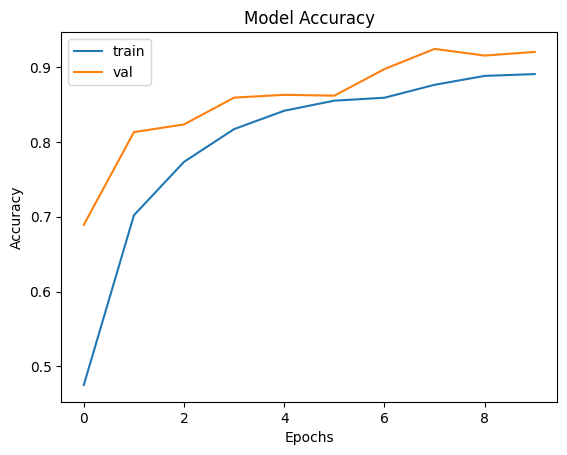

In [31]:
# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

testing the model 

In [37]:
import os

test_images_folder = '/content/test/test'
test_image_paths = [os.path.join(test_images_folder, image_name) for image_name in os.listdir(test_images_folder)]


In [38]:
from tensorflow.keras.preprocessing import image

test_images = []
for image_path in test_image_paths:
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size based on your model's input shape
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    test_images.append(img)

test_images = np.array(test_images)


In [40]:
from tensorflow.keras.models import load_model

model = load_model("/content/sample_data/plant_disease_model.h5")  


In [41]:
predictions = model.predict(test_images)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the class names from your dataset or create a list of class names if available
#class_names = ['class1', 'class2', 'class3', ...]

# Print the predicted class labels
for i, label in enumerate(predicted_labels):
    image_name = os.path.basename(test_image_paths[i])
    print(f"Image: {image_name}, Predicted Class: {label_names[label]}")


2/2 [==============================] - 0s 219ms/step
Image: TomatoYellowCurlVirus1.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: CornCommonRust1.JPG, Predicted Class: Corn_(maize)___Common_rust_
Image: TomatoHealthy3.JPG, Predicted Class: Tomato___healthy
Image: TomatoHealthy2.JPG, Predicted Class: Tomato___healthy
Image: CornCommonRust2.JPG, Predicted Class: Corn_(maize)___Common_rust_
Image: AppleCedarRust3.JPG, Predicted Class: Apple___Cedar_apple_rust
Image: TomatoYellowCurlVirus2.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: TomatoYellowCurlVirus4.JPG, Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image: TomatoEarlyBlight6.JPG, Predicted Class: Tomato___Early_blight
Image: AppleScab1.JPG, Predicted Class: Squash___Powdery_mildew
Image: CornCommonRust3.JPG, Predicted Class: Corn_(maize)___Common_rust_
Image: PotatoEarlyBlight4.JPG, Predicted Class: Potato___Early_blight
Image: TomatoEarlyBlight4.JPG, Predicted Class: Tomato___Ea

# **now lets build the model by using resnet50 a pretrained model **

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers
base_model.trainable = False

# Build the model
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 38)                9766      
                                                                 
Total params: 24,122,022
Trainable params: 534,310
Non-trainable params: 23,587,712
____________________________________

In [ ]:
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=val_steps)